- "제주 신용카드 빅데이터 경진대회"파일 사용
- 5가지 업종의 연령대, 가구 생애 주기, 성별의 비율을 구하고 파이차트로 표현

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
plt.rcParams['axes.unicode_minus']=False

In [4]:
# 파일 불러오기
df=pd.read_csv('1,2,3월_5가지업종.csv')
df

,Unnamed: 0,Unnamed: 0.1,년월,업종명,연령대,성별,생애주기,고객수,금액,건수
0,0,598167,201901,카페,20s,2,1,3,24890,3
1,1,598168,201901,카페,20s,2,1,3,17800,3
2,2,598169,201901,카페,30s,2,2,3,28500,4
3,3,598170,201901,카페,20s,1,1,3,27900,4
4,4,598171,201901,카페,40s,1,3,3,20600,3
...,...,...,...,...,...,...,...,...,...,...
224535,363235,23899428,202003,일반 음식점업,20s,1,1,8,904800,16
224536,363236,23899429,202003,일반 음식점업,30s,1,1,3,331800,4
224537,363237,23899430,202003,일반 음식점업,30s,1,2,7,1153000,28
224538,363238,23899431,202003,일반 음식점업,40s,1,3,3,73000,3


In [5]:
#'Unnamed: 0' 컬럼 삭제
df_sub=df[['년월', '업종명', '연령대', '성별', '생애주기', '고객수', '금액','건수']]

In [6]:
# 연령대의 's'문자 빼고 int로 변환
df_a=df_sub
df_a['연령대'] = df_a['연령대'].str.rstrip('s').astype('int')
df_a

C:\Users\LG\anaconda3\envs\tens_2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,년월,업종명,연령대,성별,생애주기,고객수,금액,건수
0,201901,카페,20,2,1,3,24890,3
1,201901,카페,20,2,1,3,17800,3
2,201901,카페,30,2,2,3,28500,4
3,201901,카페,20,1,1,3,27900,4
4,201901,카페,40,1,3,3,20600,3
...,...,...,...,...,...,...,...,...
224535,202003,일반 음식점업,20,1,1,8,904800,16
224536,202003,일반 음식점업,30,1,1,3,331800,4
224537,202003,일반 음식점업,30,1,2,7,1153000,28
224538,202003,일반 음식점업,40,1,3,3,73000,3


# 5가지 업종 비율

In [8]:
# 2019, 2020 표 두개로 분리
nineteenJ = df_sub['년월']==201901
nineteenF = df_sub['년월']==201902
nineteenM = df_sub['년월']==201903
twentyJ = df_sub['년월']==202001
twentyF = df_sub['년월']==202002
twentyM = df_sub['년월']==202003


df_2019=df_sub[nineteenJ|nineteenF|nineteenM]
df_2020=df_sub[twentyJ|twentyF|twentyM]

In [9]:
df_2019

,년월,업종명,연령대,성별,생애주기,고객수,금액,건수
0,201901,카페,20,2,1,3,24890,3
1,201901,카페,20,2,1,3,17800,3
2,201901,카페,30,2,2,3,28500,4
3,201901,카페,20,1,1,3,27900,4
4,201901,카페,40,1,3,3,20600,3
...,...,...,...,...,...,...,...,...
161643,201903,일반 음식점업,20,2,1,4,36700,7
161644,201903,일반 음식점업,50,1,4,11,457000,11
161645,201903,일반 음식점업,50,2,4,8,528500,9
161646,201903,관광업,50,1,4,3,344000,3


In [10]:
df_2020

,년월,업종명,연령대,성별,생애주기,고객수,금액,건수
46425,202001,카페,30,1,2,3,33600,3
46426,202001,카페,20,2,1,3,25700,3
46427,202001,카페,50,1,4,3,31800,4
46428,202001,카페,50,2,4,3,50600,3
46429,202001,카페,20,1,1,4,27100,4
...,...,...,...,...,...,...,...,...
224535,202003,일반 음식점업,20,1,1,8,904800,16
224536,202003,일반 음식점업,30,1,1,3,331800,4
224537,202003,일반 음식점업,30,1,2,7,1153000,28
224538,202003,일반 음식점업,40,1,3,3,73000,3


In [11]:
df_2020.groupby(["업종명"])["건수"].count().reset_index()

,업종명,건수
0,관광업,1925
1,스포츠 및 레크레이션 용품 임대업,4996
2,일반 음식점업,71403
3,전시 및 행사 대행업,2300
4,카페,16020


## 연령대 비율

In [12]:
# 2019년 표에서 연령대별 수 count
print(df_2019.연령대.unique())
df_2019_age = pd.DataFrame(df_2019.연령대.value_counts().sort_index(ascending=True))
df_2019_age

[20 30 40 50 60 70 10]


,연령대
10,1203
20,26274
30,28200
40,30480
50,23824
60,13800
70,4115


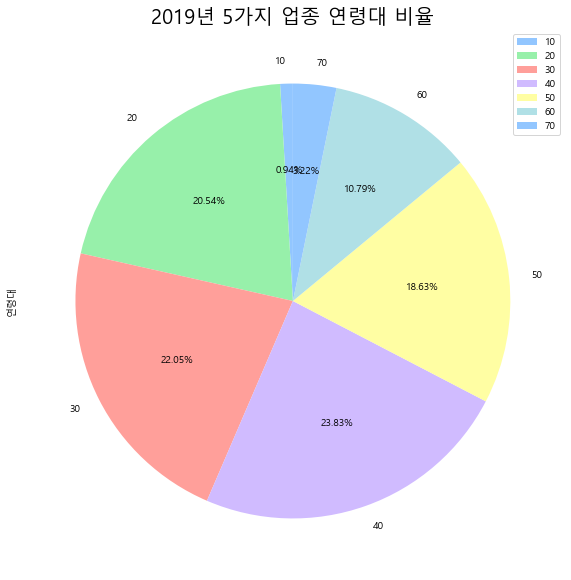

In [13]:
plt.style.use('seaborn-pastel')
df_2019_age.plot(kind = 'pie', figsize = (10,10), autopct = '%1.2f%%', startangle = 90, subplots=True)
plt.title('2019년 5가지 업종 연령대 비율', size = 20)
plt.show()

In [14]:
# 2020년 표에서 연령대별 수 count
print(df_2020.연령대.unique())
df_2020_age = pd.DataFrame(df_2020.연령대.value_counts().sort_index(ascending=True))
df_2020_age

[30 20 50 40 60 10 70]


,연령대
10,1740
20,19652
30,20487
40,23113
50,18349
60,10381
70,2922


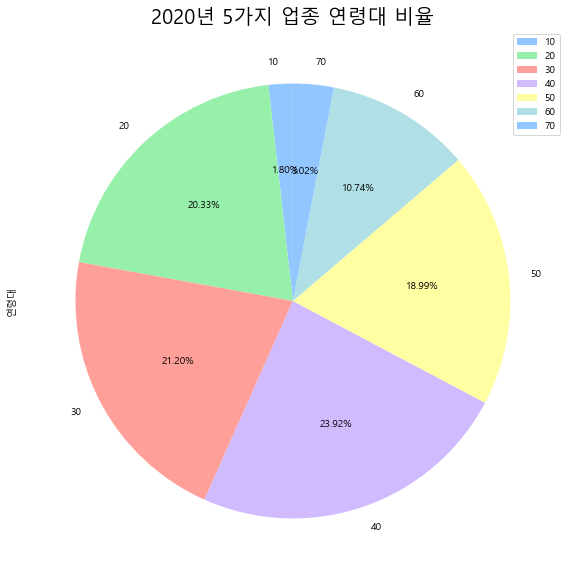

In [15]:
plt.style.use('seaborn-pastel')
df_2020_age.plot(kind = 'pie', figsize = (10,10), autopct = '%1.2f%%', startangle = 90, subplots=True)
plt.title('2020년 5가지 업종 연령대 비율', size = 20)
plt.show()

## 성별 비율

In [16]:
# 2019년 표에서 성별 수 count
print(df_2019.성별.unique())
df_2019_sex = df_2019.성별.value_counts()
df_2019_sex = pd.DataFrame(data=df_2019_sex)
df_2019_sex

[2 1]


,성별
1,77293
2,50603


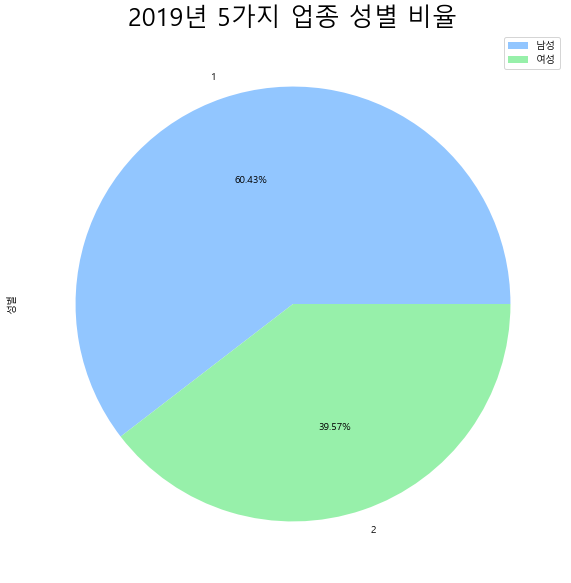

In [17]:
plt.style.use('seaborn-pastel')
df_2019_sex.plot(kind = 'pie', figsize = (10,10), autopct = '%1.2f%%', subplots=True)
plt.title('2019년 5가지 업종 성별 비율', size = 25)
plt.legend(labels=('남성','여성'))

In [18]:
# 2020년 표에서 성별 수 count
print(df_2020.성별.unique())
df_2020_sex = df_2020.성별.value_counts()
df_2020_sex = pd.DataFrame(data=df_2020_sex)
df_2020_sex

[1 2]


,성별
1,60118
2,36526


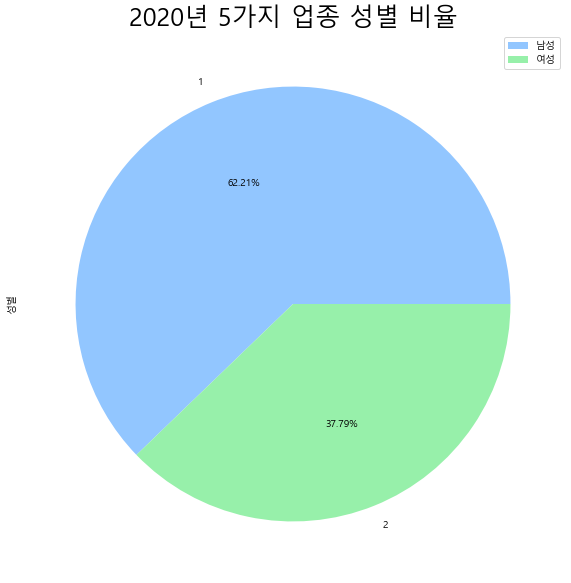

In [27]:
plt.style.use('seaborn-pastel')
df_2020_sex.plot(kind = 'pie', figsize = (10,10), autopct = '%1.2f%%', subplots=True)
plt.title('2020년 5가지 업종 성별 비율', size = 25)
plt.legend(labels=('남성','여성'))

## 가족 생애 주기

In [19]:
# 2019년 표에서 가족생애주기별 수 count
print(df_2019.생애주기.unique())
df_2019_fam = pd.DataFrame(df_2019.생애주기.value_counts().sort_index(ascending=True))
df_2019_fam

[1 2 3 4 5]


,생애주기
1,28166
2,30628
3,20738
4,30449
5,17915


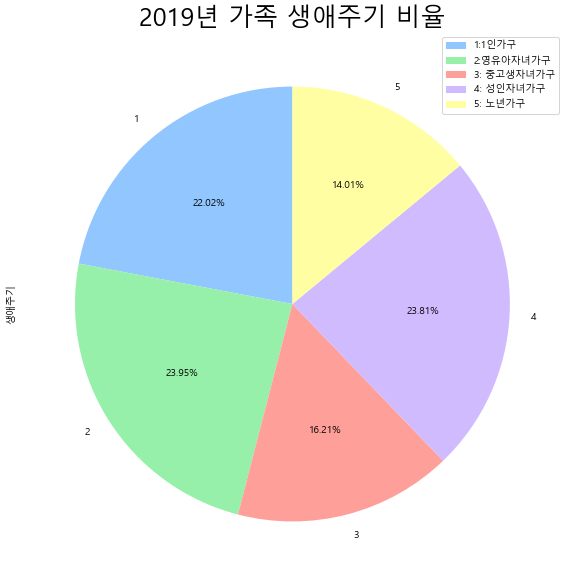

In [20]:
df_2019_fam.plot(kind = 'pie', figsize = (10,10), autopct = '%1.2f%%', startangle = 90, subplots=True)
plt.title('2019년 가족 생애주기 비율', size = 25)
plt.legend(labels=('1:1인가구', '2:영유아자녀가구', '3: 중고생자녀가구', '4: 성인자녀가구', '5: 노년가구'))
plt.show()

In [21]:
# 2020년 표에서 가족생애주기별 수 count
print(df_2020.생애주기.unique())
df_2020_fam = pd.DataFrame(df_2020.생애주기.value_counts().sort_index(ascending=True))
df_2020_fam

[2 1 4 3 5]


,생애주기
1,21853
2,22303
3,15547
4,23638
5,13303


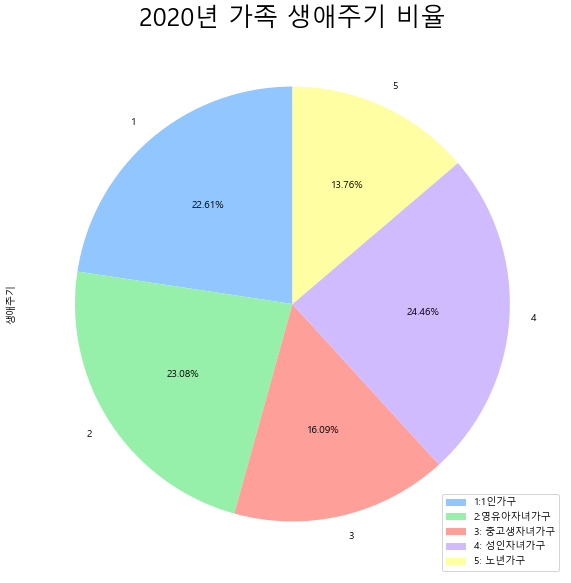

In [22]:
df_2020_fam.plot(kind = 'pie', figsize = (10,10), autopct = '%1.2f%%', startangle = 90, subplots=True)
plt.title('2020년 가족 생애주기 비율', size = 25)
plt.legend(labels=('1:1인가구', '2:영유아자녀가구', '3: 중고생자녀가구', '4: 성인자녀가구', '5: 노년가구'))
plt.show()